In [1]:
import pipeline

from sklearn.metrics import * 

import pandas as pd
import numpy as np
from pipeline import analyze_best_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# setup 
df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_by_year(df, colname='year_evictions')
pipeline.split_boundaries(splits, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]
labeled_splits = [pipeline.label(split, lower_bound=14, drop_column=True)
                  for split in cleaned_splits]

In [3]:
# classifiers 
train_df = labeled_splits[5][0]
test_df = labeled_splits[5][1]

params = {'C': 0.1, 'penalty': 'l1'}
model = LogisticRegression()
label ='label'
k = 0.16

analyze_best_model.top_k_blocks_clf(model, params, train_df, test_df, label, k).head(10)

,GEOID,label,pred_scores
6215,421010273003,1,1.000000
6978,421010301002,1,1.000000
8511,421010353021,1,0.999991
8315,421010346001,1,0.999991
8938,421010373003,1,0.999990
5389,421010243002,1,0.999951
6103,421010268001,1,0.999944
8980,421010377002,1,0.999895
5711,421010257001,1,0.999786
5291,421010238004,1,0.999769


0.13847305389221556


<Figure size 432x288 with 0 Axes>

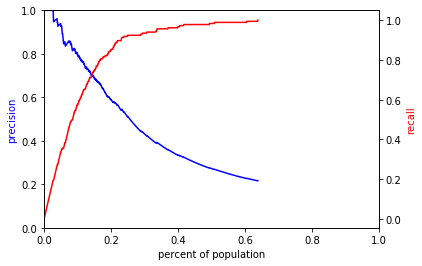

In [4]:
# classifiers 
train_df = labeled_splits[4][0]
test_df = labeled_splits[4][1]

params = {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 1000}
model = RandomForestClassifier()
label ='label'

analyze_best_model.plot_precision_recall_n(model, params, train_df, test_df, label)

In [5]:
analyze_best_model.feature_importance_clf(model, params, train_df, test_df, label)

,feature,importance
23,evictions_t-2_scaled,0.215695
22,evictions_t-1_scaled,0.190464
24,evictions_t-5_scaled,0.159429
29,total_renter_households_scaled,0.038687
35,vacant_units_scaled,0.031789
25,crime_count_scaled,0.029815
8,total_renter_households_percent,0.025793
37,num_af_am_alone_scaled,0.023526
33,units_scaled,0.022723
36,for_rent_units_scaled,0.019842


In [6]:
# regresssions 
train_df = cleaned_splits[5][0]
test_df = cleaned_splits[5][1]

params = {'C': 0.1}
model = LinearSVR()
label ='evictions'
k = 0.16

analyze_best_model.top_k_blocks_reg(model, params, train_df, test_df, label, k).head(10)

,GEOID,evictions,preds
6215,421010273003,128.0,64.111847
6978,421010301002,83.0,61.161449
8315,421010346001,58.0,43.213666
8938,421010373003,31.0,42.167985
8511,421010353021,49.0,42.071022
5389,421010243002,58.0,40.495278
6103,421010268001,58.0,39.452453
5711,421010257001,51.0,36.100350
8385,421010348021,47.0,35.996345
6964,421010300007,37.0,34.633157


In [7]:
analyze_best_model.feature_importance_reg(model, params, train_df, test_df, label).head(10)

,feature,coef,absv_coef
22,evictions_t-1_scaled,2.578452,2.578452
23,evictions_t-2_scaled,2.242405,2.242405
24,evictions_t-5_scaled,1.483415,1.483415
40,num_with_high_school_degree_scaled,-1.236965,1.236965
42,num_unemployed_scaled,-1.023250,1.023250
2,subbed,0.816098,0.816098
44,violations_count_percent_binary,0.816098,0.816098
41,num_with_ged_scaled,-0.778066,0.778066
11,num_af_am_alone_percent,0.659218,0.659218
45,vacant_units_percent_binary,-0.443193,0.443193
